# 6.2 Exploring relationships

### This script contains the following:

#### 1. Importing Visualization Libraries and Data
#### 2. Data Cleaning
#### 3. Exploring Relationships
     Correlations
     Scatterplots
     Pair Plots
     Categorical Plots

### 1. Importing Visualization Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

#### Note about matplotlib:

There are certain bugs associated with some versions of matplotlib. Before you start your analysis, you should check what version you have by typing `matplotlib.__version__` in a Jupyter cell and executing it. If it shows version 3.1.1, you'll likely experience some problems with the way the heatmap appears.

To circumvent this, we recommend opening a new Anaconda terminal and executing this command: `conda update --all`. This will update all of your packages and install the newest version of matplotlib, where this bug has been fixed. 

Then, restart the kernel for your notebook (so it can pick up any changes to your library versions) and rerun your code, which will re-import the libraries in your notebook. Check the version again, and you should have the latest version installed.

In [9]:
matplotlib.__version__

'3.7.2'

In [11]:
# This option ensures the charts you create are displayed in the notebook without the need to "call" them specifically.

%matplotlib inline

In [13]:
# Define path

path = r'C:\Users\toloz\Achivement 6 data immersion\03 scripts\Data Immersion 6.2\Examples'

In [15]:
# Import data

df = pd.read_csv(os.path.join(path, 'real_estate.csv'))

In [23]:
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


### 2. Data Cleaning

#### Renaming Columns:

In [19]:
df.shape

(414, 8)

In [25]:
df.columns

Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

In [27]:
# Rename columns whose names are too long

df.rename(columns = {'X1 transaction date' : 'Date', 'X2 house age': 'House age', 
                     'X3 distance to the nearest MRT station': 'D. metro', 'X4 number of convenience stores': 'N. shops',
                     'Y house price of unit area': 'Price per unit', 'X5 latitude' : 'Latitude', 'X6 longitude' : 'Longitude' },
                      inplace = True)

In [29]:
df.dtypes

No                  int64
Date              float64
House age         float64
D. metro          float64
N. shops            int64
Latitude          float64
Longitude         float64
Price per unit    float64
dtype: object

In [31]:
df.head()

,No,Date,House age,D. metro,N. shops,Latitude,Longitude,Price per unit
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


#### Missing Values Check:

In [34]:
# Check for missing values

df.isnull().sum() # No missing values!

No                0
Date              0
House age         0
D. metro          0
N. shops          0
Latitude          0
Longitude         0
Price per unit    0
dtype: int64

#### Duplicates Check:

In [37]:
# Find duplicates

df_dups = df[df.duplicated()]

In [39]:
df_dups.shape # No duplicates!

(0, 8)

#### Mixed-Type Data:

In [42]:
for col in df.columns.tolist():
      weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
      if len (df[weird]) > 0:
        print (col)
        
# No mixed-type columns either!

### 3. Exploring Relationships

### Correlations:

In [46]:
# Create a correlation matrix using pandas

df.corr()

,No,Date,House age,D. metro,N. shops,Latitude,Longitude,Price per unit
No,1.000000,-0.048658,-0.032808,-0.013573,-0.012699,-0.010110,-0.011059,-0.028587
Date,-0.048658,1.000000,0.017549,0.060880,0.009635,0.035058,-0.041082,0.087491
House age,-0.032808,0.017549,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567
D. metro,-0.013573,0.060880,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613
N. shops,-0.012699,0.009635,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005
Latitude,-0.010110,0.035058,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307
Longitude,-0.011059,-0.041082,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287
Price per unit,-0.028587,0.087491,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000


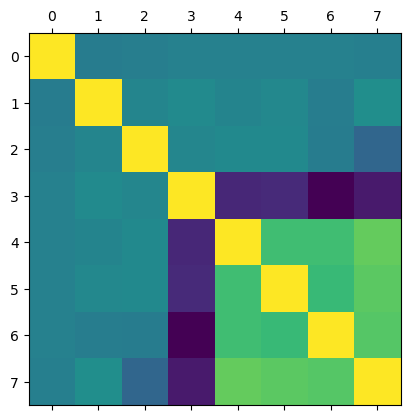

In [48]:
# Create a correlation heatmap using matplotlib

plt.matshow(df.corr())
plt.show()

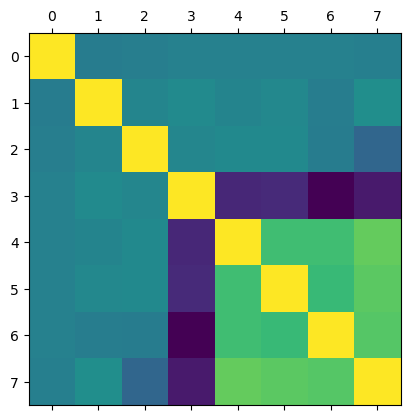

In [50]:
# Save figure
plt.matshow(df.corr())
plt.savefig("out.png") 

# This will save the image in the working directory. 
#If you don't know what this directory is the next line will show you how to check

In [18]:
#current dir
cwd = os.getcwd()
cwd

'C:\\Users\\asus\\Downloads'

Text(0.5, 1.0, 'Correlation Matrix')

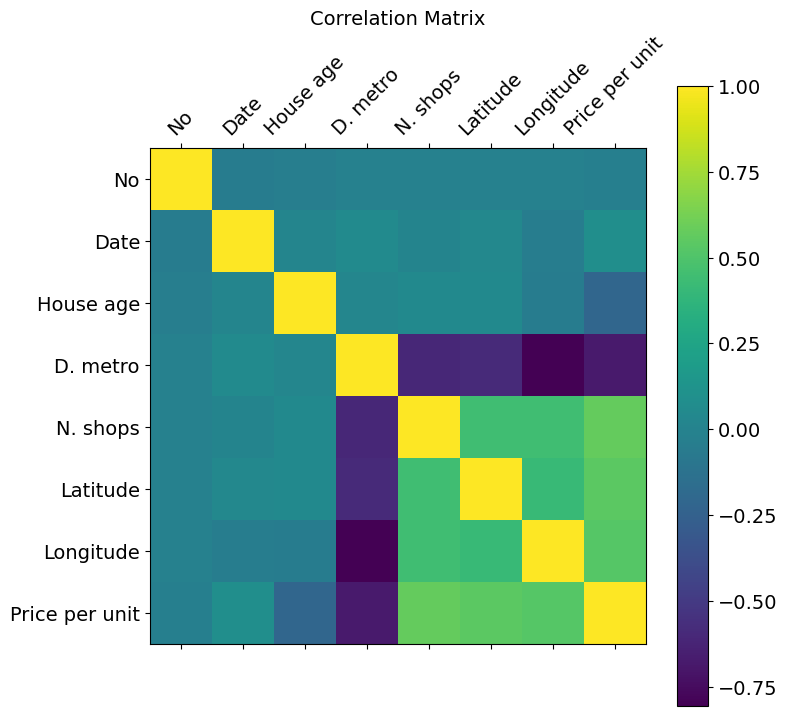

In [52]:
# Add labels, a legend, and change the size of the heatmap

f = plt.figure(figsize=(8, 8)) # figure size 
plt.matshow(df.corr(), fignum=f.number) # type of plot
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=45) # x axis labels
plt.yticks(range(df.shape[1]), df.columns, fontsize=14) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

#### Create a correlation heatmap using seaborn:

In [55]:
df.columns

Index(['No', 'Date', 'House age', 'D. metro', 'N. shops', 'Latitude',
       'Longitude', 'Price per unit'],
      dtype='object')

In [57]:
# Create a subset excluding the "Date" and "No" columns

sub = df[['House age', 'D. metro', 'N. shops', 'Latitude','Longitude', 'Price per unit']]

In [59]:
sub

,House age,D. metro,N. shops,Latitude,Longitude,Price per unit
0,32.0,84.87882,10,24.98298,121.54024,37.9
1,19.5,306.59470,9,24.98034,121.53951,42.2
2,13.3,561.98450,5,24.98746,121.54391,47.3
3,13.3,561.98450,5,24.98746,121.54391,54.8
4,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...
409,13.7,4082.01500,0,24.94155,121.50381,15.4
410,5.6,90.45606,9,24.97433,121.54310,50.0
411,18.8,390.96960,7,24.97923,121.53986,40.6
412,8.1,104.81010,5,24.96674,121.54067,52.5


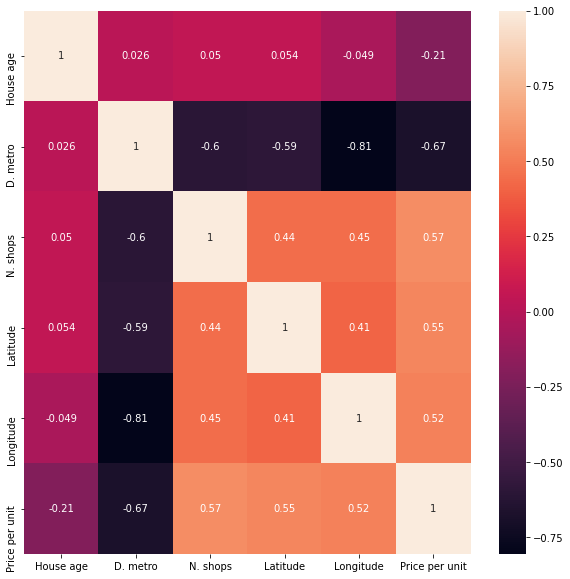

In [23]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(sub.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

### Scatterplots:

C:\Users\toloz\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


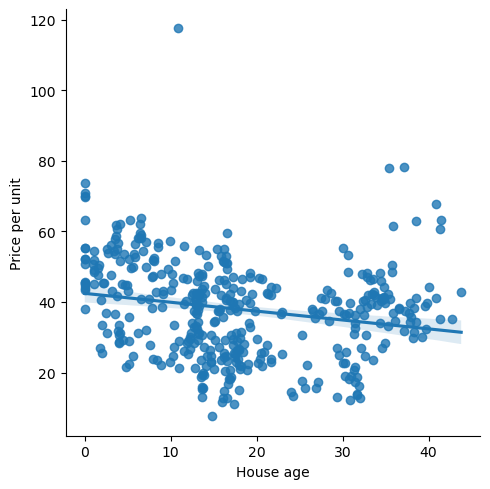

In [61]:
# Create a scatterplot for the "house age" and "price per unit" columns in seaborn

sns.lmplot(x = 'House age', y = 'Price per unit', data = df)

### Pair Plots:

In [63]:
# Keep only the variables you want to use in the pair plot

sub_2 = sub[['House age', 'D. metro', 'N. shops', 'Price per unit']]

C:\Users\toloz\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


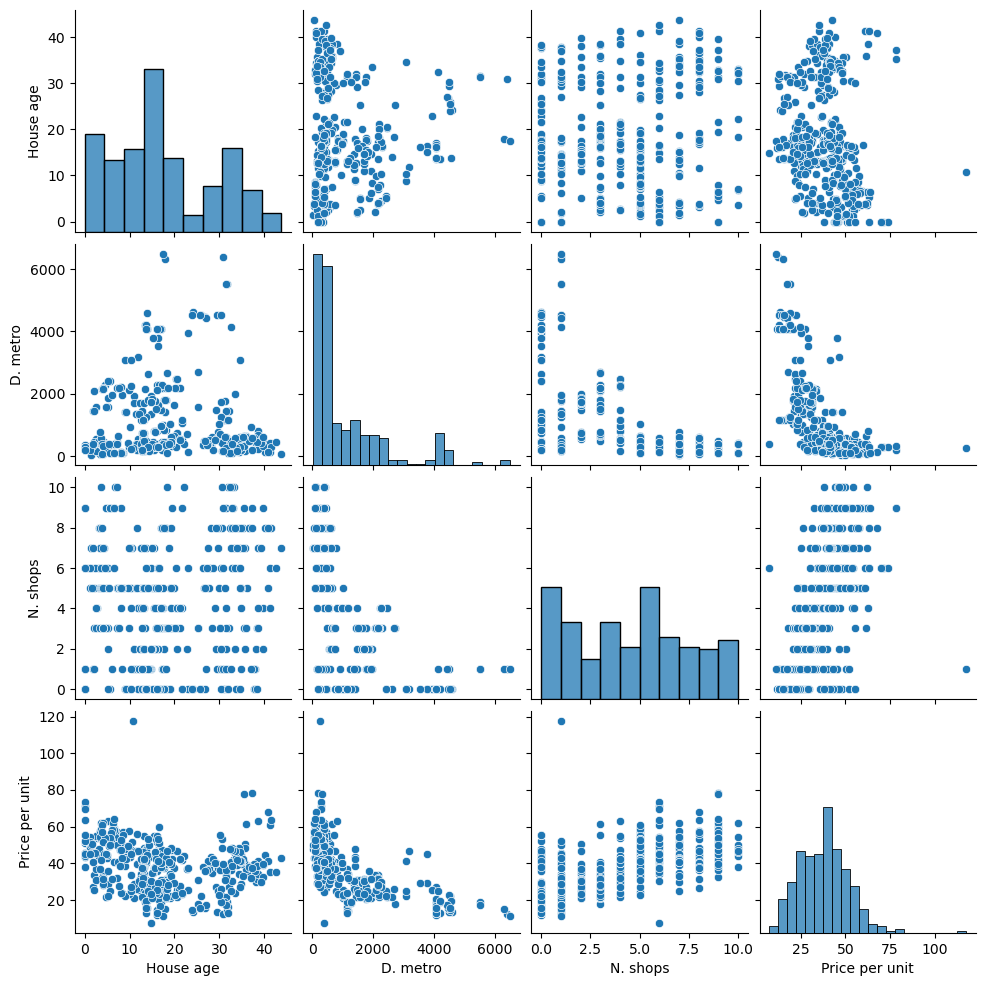

In [65]:
# Create a pair plot 

g = sns.pairplot(sub_2)

### Categorical Plots:

##### Creating a categorical variable that splits the "Price per Unit" column into categories

<AxesSubplot:xlabel='Price per unit', ylabel='Count'>

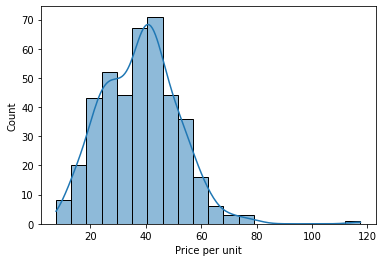

In [27]:
# Use a histogram to visualize the distribution of the variables. 
# This way, you can determine sensible categories for the price ranges. 
# You don't want to end up with too few observations in any one of the categories.
# The argument "kde" add a line that encompasses the distribution

sns.histplot(df['Price per unit'], bins = 20, kde = True)

In [28]:
df.loc[df['Price per unit'] < 20, 'Price category'] = 'Low price'

In [29]:
df.loc[(df['Price per unit'] >= 20) & (df['Price per unit'] < 50), 'Price category'] = 'Middle price'

In [30]:
df.loc[df['Price per unit'] >= 50, 'Price category'] = 'High price'

In [31]:
df['Price category'].value_counts(dropna = False)

Middle price    305
High price       74
Low price        35
Name: Price category, dtype: int64

In [32]:
df.columns

Index(['No', 'Date', 'House age', 'D. metro', 'N. shops', 'Latitude',
       'Longitude', 'Price per unit', 'Price category'],
      dtype='object')

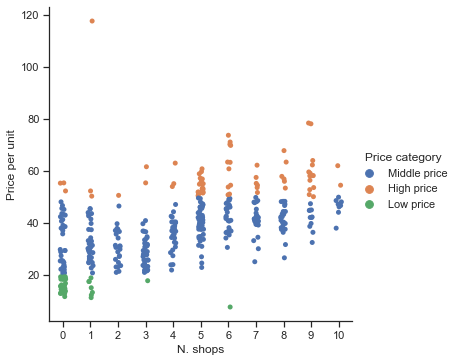

In [33]:
# Create a categorical plot in seaborn using the price categories created above

sns.set(style="ticks")
g = sns.catplot(x="N. shops", y="Price per unit", hue="Price category", data=df)

In [34]:
# fig = g.get_figure()
g.savefig("out.png") 

# Again, the image will be saved in the working directory. 